# Iris(붓꽃) 예측모델
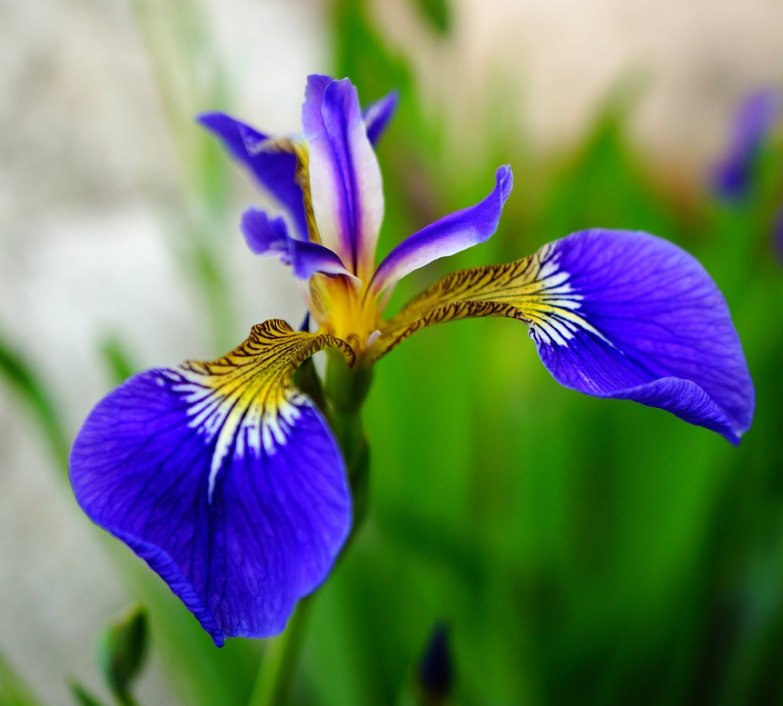

- 프랑스 국화
- 꽃말 : 좋은 소식, 잘 전해 주세요, 사랑의 메세지, 변덕스러움

## 머신러닝의 Helloworld

- 데이터 과학에서 Iris DataSet
    - 아이리스 품종 중 Setosa, Versicolor, Virginica 분류에 대한 [**로널드 피셔**](https://ko.wikipedia.org/wiki/%EB%A1%9C%EB%84%90%EB%93%9C_%ED%94%BC%EC%85%94)의  1936년 논문에서 사용된 데이터 셋.
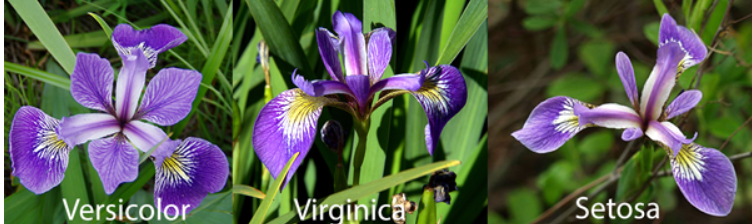



- 꽃받침(Sepal)과 꽃잎(Petal)의 길이 너비로 세개 품종을 분류
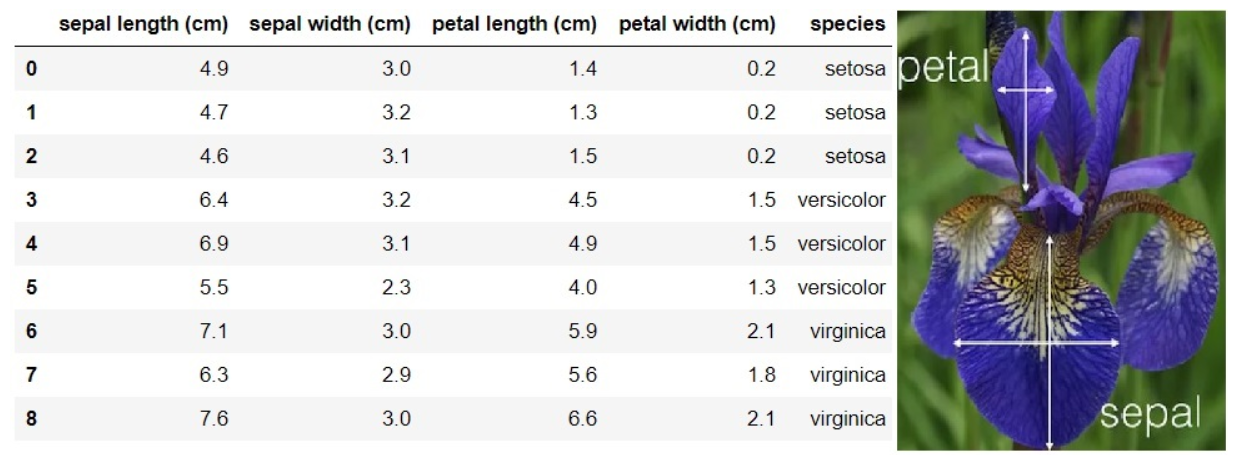

## 데이터셋 확인하기

### <span style='background-color:#fff5b1'>scikit-learn 내장 데이터셋 가져오기</span>
- scikit-learn은 머신러닝 모델을 테스트 하기위한 데이터셋을 제공한다.
    - 이런 데이터셋을 Toy dataset이라고 한다.
- 패키지 : <span style='background-color:#fff5b1'>sklearn.datasets</span>
- 함수   : <span style='background-color:#fff5b1'>load_xxxx()</span>

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()  # 데이터를 메모리에 loading => Bunch => Dictionary 같은 것.(딕셔너리는 아님.)
type(iris)

sklearn.utils._bunch.Bunch

### <span style='background-color:#fff5b1'>scikit-learn 내장 데이터셋의 구성
- scikit-learn의 dataset은 딕셔너리 구조의 Bunch 클래스 객체이다.
    - keys() 함수로 key값들을 조회
- 구성
    - **target_names**: 예측하려는 값(class)을 가진 문자열 배열
    - **target**: Label(출력데이터)
    - **data**: Feature(입력변수)
    - **feature_names**: 입력변수 각 항목의 이름
    - **DESCR**: 데이터셋에 대한 설명

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
# 입력 데이터셋(Feature)
#ir                     을 대괄호 안으로 호출 가능
print(type(iris.data), iris.data.shape)
# scikit learn : Input/Output dataset ==> ndarray 를 사용.
# input.shape(0축: 데이터포인트 개수, 한개 데이터포인트의 shape)
# (150, 4) -> 150개의 데이터포인틀 구성된 데이터 셋. 1개의 데이터 포인트는 4개의 원소로 구성된 1 차원 배열.

<class 'numpy.ndarray'> (150, 4)


##### <span style='background-color:#fff5b1'>Feature 조회

In [10]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [11]:
iris['feature_names'] # 각 Feature 가 어떤 값인지 설명.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
import numpy as np

##### target(label) 조회 

In [103]:
# iris['target']
print(type(iris.target), iris.target.shape)
print(np.unique(iris.target, return_counts = True))

<class 'numpy.ndarray'> (150,)
(array([0, 1, 2]), array([50, 50, 50]))


- <b style='font-size:1.3em'>target : 0, 1, 2 ==> 정답 범주형, -> 지도학습의 분류(classification)문제

In [100]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- <span style='background-color:#fff5b1'><b style='font-size:1.3em'>input(features), output(labels)은 숫자(정수/실수) 여야 한다. </span>
    - 모델 - 알고리즘은 모두 계산하는 함수이기 때문이다.

In [21]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 위 데이터 셋을 판다스 데이터프레임으로 구성
- 데이터 프레임 생성 후 데이터 확인
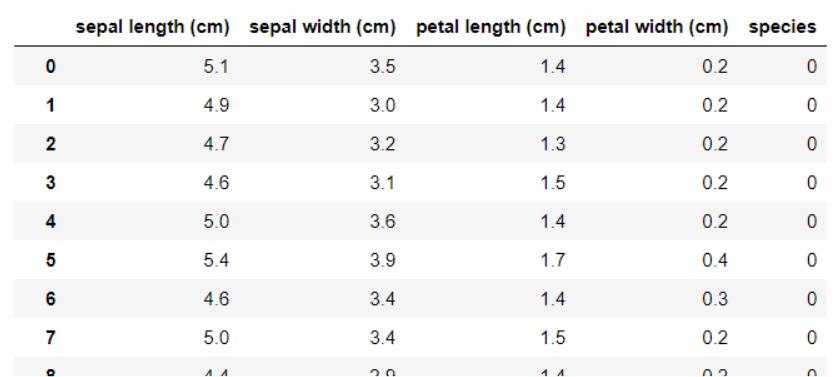

In [29]:
import pandas as pd

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
df['species_2'] = df['species'].apply(lambda x: iris.target_names[x])

In [39]:
df.head()
df.tail()
df.iloc[60:65]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_2
60,5.0,2.0,3.5,1.0,1,versicolor
61,5.9,3.0,4.2,1.5,1,versicolor
62,6.0,2.2,4.0,1.0,1,versicolor
63,6.1,2.9,4.7,1.4,1,versicolor
64,5.6,2.9,3.6,1.3,1,versicolor


> - **dataframe/Series.apply(함수)**
>     - (dataframe) 함수에 DataFrame의 컬럼(Series)를 전달해서 처리된 값들을 모아 반환
>     - (Series) 함수에 원소들을 전달해서 처리된 값들을 모아서 반환
>     - 일괄처리시 사용하는 메소드

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_2          150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [42]:
df.columns[:-1]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

### corr() 함수 재확인.

In [44]:
df[df.columns[:-1]].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [47]:
df[df.columns[:-1]].groupby('species').describe().T.head()

species                         0          1         2
sepal length (cm) count  50.00000  50.000000  50.00000
                  mean    5.00600   5.936000   6.58800
                  std     0.35249   0.516171   0.63588
                  min     4.30000   4.900000   4.90000
                  25%     4.80000   5.600000   6.22500

# 머신러닝을 이용한 예측

## 문제 정의
> 내가 발견한 Iris 꽃받침(Sepal)의 길이(length)와 폭(width)이 각각 5cm, 3.5cm이고 꽃의 꽃잎(Petal)의 길이와 폭은 각각 1.4cm, 0.25cm이 이었다. 이 꽃는 Iris의 무슨 종일까?

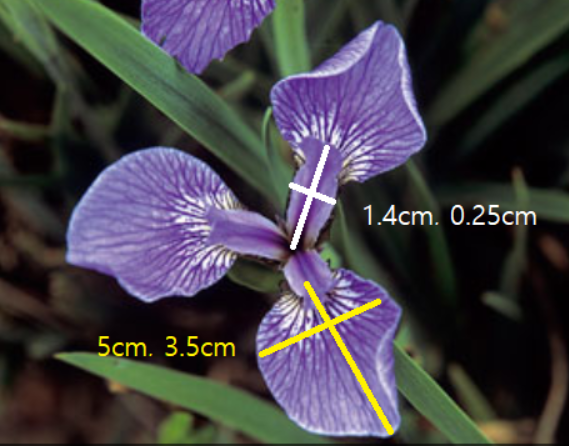

### 규칙기반으로 찾아보기

- 꽃받침(Sepal)의 길이(length): 5cm, 폭(width): 3.5cm
- 꽃잎(Petal) 의 길이(length): 1.4cm, 폭(width): 0.25cm

In [50]:
df[(df['sepal length (cm)'] == 5) & (df['sepal width (cm)'] == 3.5)] # 규칙기반 알고리즘

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_2
40,5.0,3.5,1.3,0.3,0,setosa
43,5.0,3.5,1.6,0.6,0,setosa


## 머신러닝 적용

### 머신러닝으로 우리가 하려는 것
<font size='4'><b> 프로그래머가 직접 규칙(패턴)을 만드는  대신 컴퓨터가 데이터를 학습하여 규칙을 자동으로 만들도록 하는 것.</b></font>

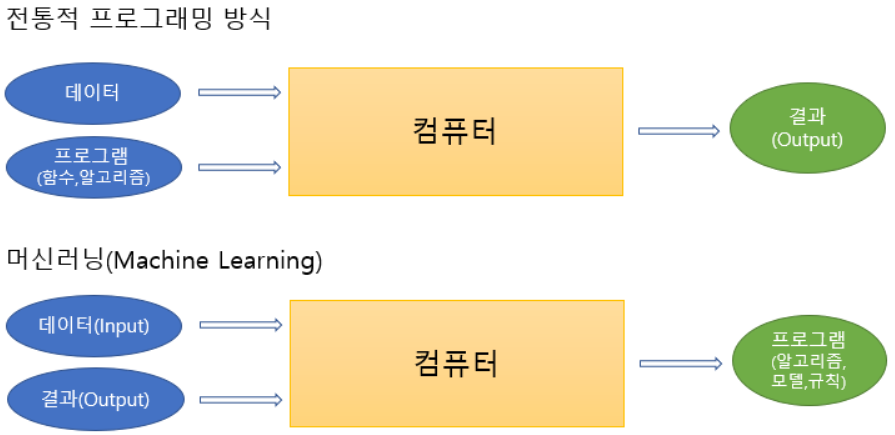

###  결정 트리(Decision Tree) 알고리즘을 이용한 분류
#### 결정 트리 알고리즘 개요
- 독립 변수의 조건에 따라 종속 변수를 분리 


- 결정 트리는 스무고개 느낌이다.  // 제일 중요한 것 부터 질문 한다.

- 질문하고 나면 그 다음으로 중요한 질문을 한다.
그 이유는 최대한 알맞게 분류하기 위해서다.

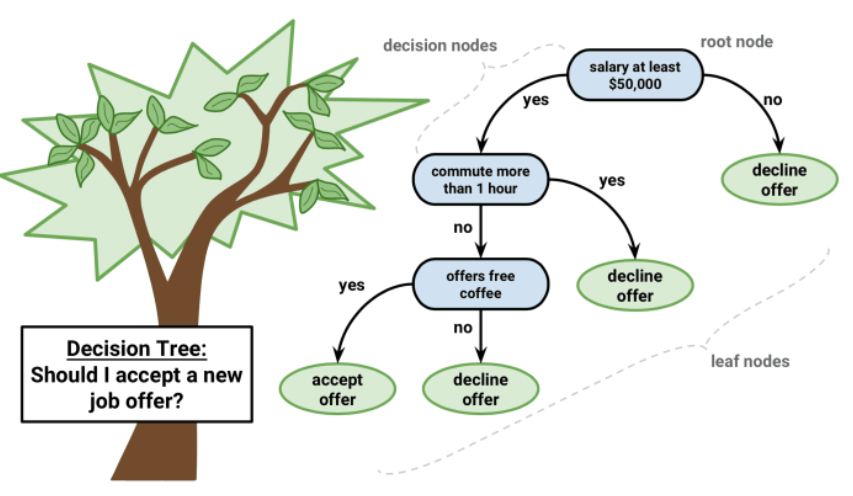

<center>[참조]www.packtpub.com</center>

#### 결정트리 모델을 이용해 머신러닝 구현
1. import 모델
2. 모델 생성
3. 모델 학습시키기
4. 예측 

##### 1. import 모델

In [110]:
from sklearn.tree import DecisionTreeClassifier

- <b style='font-size:1.3em'>Classifier: 분류
- <b style='font-size:1.3em'>Regressor: 회귀

##### 2. 모델생성 
<span style='background-color:#fff5b1'><b style='font-size:1.3em'>- DecisionTreeClassifier()</b></span>

In [111]:
# 모델 객체 생성
tree = DecisionTreeClassifier(random_state = 0) # random_state = 0 : random value의 seed 값 설정.

##### 3. 모델 학습 시키기
- <span style='background-color:#fff5b1'><b style='font-size:1.3em'>tree.fit()</b></span>

- 우리가 가진 데이터셋에 맞는 n을 찾는 작업.
- 학습을 통해서 찾아여 하는 n => Parameter 라고 한다.
- 입력데이터(Features): X, 출력데이터(Label) : y
- tree(iris.data, iris.target)

In [112]:
X = iris.data
y = iris.target
tree.fit(X,y)

DecisionTreeClassifier(random_state=0)

##### 4. 예측
- 내가 본 iris 꽃의 꽃잎/꽃받침의 길이, 너비를 재서 종류를 예측한다. 

In [ ]:
꽃받침(Sepal)의 길이(length): 5cm, 폭(width): 3.5cm
꽃잎(Petal) 의 길이(length): 1.4cm, 폭(width): 0.25cm

- <b style='font-size:1.3em'> 4-1. 우리가 추론 할 데이터셋 배열 구현
    - <span style='background-color:#fff5b1'>np.array([       ])
    - <b style='font-size:1em'>( 2, 4 )는 ( 내가 추론할 데이터의 개수, 그 데이터 원소 개수 )를 의미한다.

In [113]:
import numpy as np
new_X = np.array([[5.0, 3.5, 1.4, 0.25],[3.2, 1.5, 6.4, 3.25]])
new_X.shape  # 우리가 추론할 데이터셋. (데이터개수, 데이터 shape)

(2, 4)

- <b style='font-size:1.3em'> 4-2. 추론을 추출
   - <span style='background-color:#fff5b1'> tree.predict()</span>

In [114]:
# 추론할 꽃의 정보(Feature들)을 넣어 모델의 predict()메소드를 호출, 추론 결과 클래스를 반환
pred_y = tree.predict(new_X) 

In [115]:
print(pred_y) # label의 class가 반환
print(iris.target_names[pred_y]) # class 이름이 뭔지 찾는 과정

[0 2]
['setosa' 'virginica']


- <b style='font-size:1.3em'>4-3. 확률을 추출
    - <span style='background-color:#fff5b1'> tree.predict_proba() : 모델이 추론한 class 별 확률을 반환.</span>
    - [1. 0. 0.] => class 0일 확률: 1.0(100%) // class 1일 확률: 0.0 // class 2일 확률: 0.0

In [116]:
proba_y = tree.predict_proba(new_X)
print(proba_y)

[[1. 0. 0.]
 [0. 0. 1.]]


# 그런데 이 결과가 맞을까?

- 모델이 추론한 결과가 맞다는 것을 어떻게 보증할 수 있을까?
- 모델을 최종 서비스에 적용하기 전에 모델의 성능을 확인하는 작업이 필요하다.

## 머신러닝 프로세스

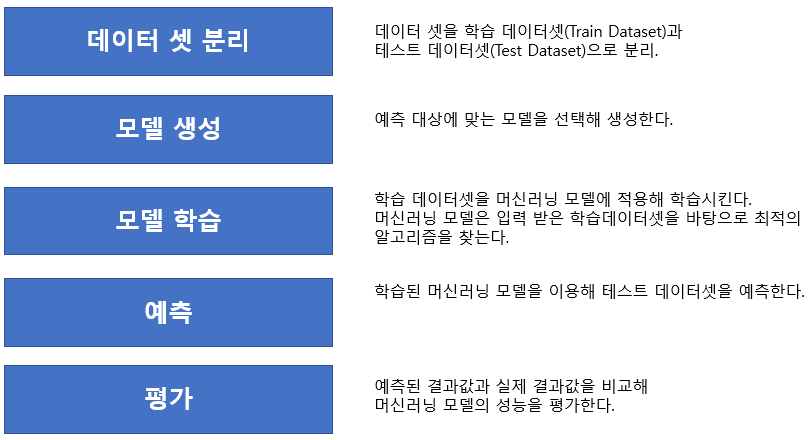

### <span style='background-color:#fff5b1'> 훈련데이터셋과 평가(테스트)데이터 분할
- 위의 예는 우리가 만든 모델이 성능이 좋은 모델인지 나쁜 모델인지 알 수 없다.
- 전체 데이터 셋을 두개의 데이터셋으로 나눠 하나는 모델을 훈련할 때 사용하고 다른 하나는 그 모델을 평가할 때 사용한다.
- 보통 훈련데이터와 테스트데이터의 <span style='background-color:#fff5b1'>비율은 8:2 또는 7:3 정도로 </span>나누는데 데이터셋이 충분하다면 6:4까지도 나눈다.

#### 데이터셋 분할시 주의
- 분류 문제의 경우 각 클래스(분류대상)가 같은 비율로 나뉘어야 한다. 

### scikit-learn의  train_test_split() 함수를 이용해 iris 데이터셋 분할
- <span style='background-color:#fff5b1'> train_test_split() : 하나의 데이터셋을 두개의 세트로 분할 하는 함수

In [97]:
from sklearn.datasets import load_iris # Iris dataset을 제공하는 함수
from sklearn.model_selection import train_test_split # Dataset을 분리하는 함수
from sklearn.tree import DecisionTreeClassifier # DecisionTree의 분류 모델을 제공하는 클래스
from sklearn.metrics import accuracy_score # 정확도 (몇개 맞았는지.) 평가 지표함수
import numpy as np

In [95]:
iris = load_iris()
X = iris.data
y = iris.target

In [96]:
# X, y(전체 데이터셋)을 Train dataset 과 Test dataset으로 분리.
X_train, X_test, y_train, y_test = train_test_split(X, # 전체데이터셋 중 Features, input
                                                    y, # 전체데이터셋 중 Labels, output(target)
                                                    test_size = 0.2,# (20%) //  전체중 test set의 비율 (기본값: 0.25)
                                                   stratify = y, # 전체 데이터셋의 출력 클래스의 비율과 동일한 비율로 나눠지도록 한다.분류 Dataset을 나눌때 필수, (회귀는 하지 않음.)
                                                   shuffle = True, # 데이터셋을 나누기 전에 섞는지(랜덤) 여부: True - 섞는다.(기본값), False - 안 섞는다.
                                                   random_state = 0 # random seed 값.
                                                   )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X.shape, y.shape)

(120, 4) (30, 4) (120,) (30,)
(150, 4) (150,)


In [74]:
150 * 0.8

120.0

In [99]:
np.unique(y, return_counts = True)

(array([0, 1, 2]), array([50, 50, 50]))

In [82]:
np.unique(y_train, return_counts = True) # 80%

(array([0, 1, 2]), array([40, 40, 40]))

In [77]:
np.unique(y_test, return_counts = True) # 20%

(array([0, 1, 2]), array([10, 10, 10]))

### 모델생성

In [83]:
tree = DecisionTreeClassifier(random_state = 0)

### 모델 학습

In [84]:
# train set을 이용해서 학습(train)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### 평가
- 머신러닝 평가지표 함수들은 sklearn.metrics 모듈에 있다.
- 정확도(accuracy)
    - <span style='background-color:#fff5b1'>accuracy_score() </span>함수 이용    
    - 전체 예측한 개수 중 맞춘 개수의 비율
    - <span style='background-color:#fff5b1'>전체중 몇개가 일치하는지 비율 // 1.0 = 100% 
    - <span style='background-color:#fff5b1'>accuracy_score(정답, 모델의 예측결과)

In [86]:
a = [0, 0, 1, 1, 1]
b = [0, 0, 1, 1, 0]
accuracy_score(a, b)   # 전체중 몇개가 일치하는지 비율 // 1.0 = 100% // accuracy_score(정답, 모델의 예측결과)

0.8

In [87]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [88]:
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)

In [89]:
print(f'Train set 예측결과의 정확도: {acc_train}')
print(f'Test set 예측결과의 정확도: {acc_test}')

Train set 예측결과의 정확도: 1.0
Test set 예측결과의 정확도: 0.9666666666666667


- <span style='background-color:#fff5b1'>**혼동행렬 (Confusion Matrix)** 을 통해 확인
    - 모델이 예측한 결과와 실제 정답간의 개수를 표로 제공
    - 분류의 평가 지표로 사용된다.
    - sklearn.metrics 모듈의 confusion_matrix() 함수 이용
    - 결과 ndarray 구조
        - axis=0의 index: 정답(실제)의 class 
        - axis=1의 index: 예측결과의 class
        - value: 개수(각 class별 정답/예측한 개수)

In [91]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, pred_train) # (정답, 모델의 예측결과)
test_cm = confusion_matrix(y_test, pred_test)

In [92]:
print(train_cm) 

[[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]


>- 정답이 0인데 0으로 예측한 것이 40 개
>- 정답이 1인데 1로 예측한 것이 40개
>- 정답이 2인데 2로 예측한 것이 40개

In [94]:
print(test_cm)

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
